In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import copy

In [26]:
def plot_samples(sample_n, shot_n, save=False, save_name=None):
    
    fig, axs = plt.subplots(
        nrows=3,
        ncols=3,
        figsize=(10, 10),
    )

    for i in range(ncols):
            img = mpimg.imread(f'/Users/sofija/Desktop/example depths/Capture_Sample_{sample_n}_{shot_n+i}.jpeg')
            axs[0, i].imshow(img)
            axs[0, i].axis("off")

            img = mpimg.imread(f'/Users/sofija/Desktop/example depths/Capture_Sample_{sample_n}_{shot_n+i}.jpg')
            axs[1, i].imshow(img)
            axs[1, i].axis("off")

            img = mpimg.imread(f'/Users/sofija/Desktop/example depths/Capture_Sample_ToF_{sample_n}_{shot_n+i}.jpg')
            axs[2, i].imshow(img)
            axs[2, i].axis("off")

    plt.tight_layout()
    if save: 
        plt.savefig("/Users/sofija/Desktop/example depths/" + save_name)

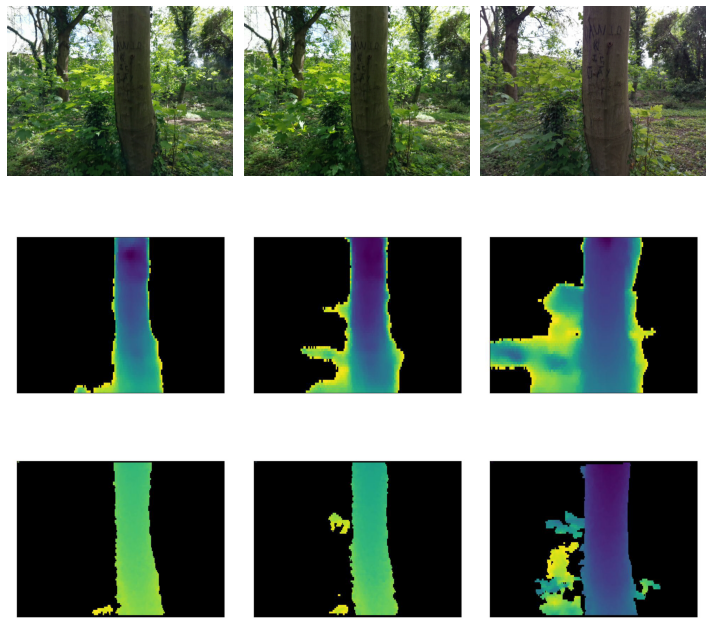

In [22]:
%matplotlib inline

plot_samples(sample_n=11, shot_n=13)

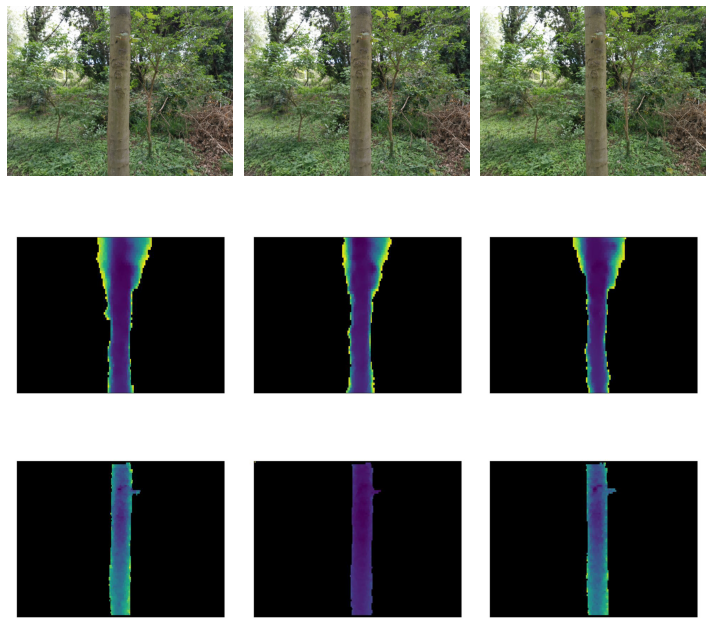

In [21]:
%matplotlib inline

plot_samples(sample_n=22, shot_n=46)

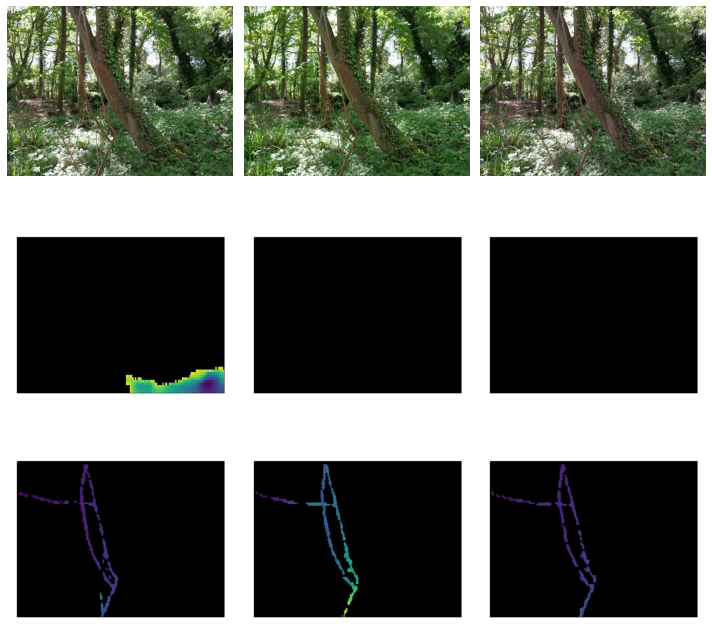

In [27]:
plot_samples(sample_n=25, shot_n=55, save=True, save_name="sample_25_plot.jpg")

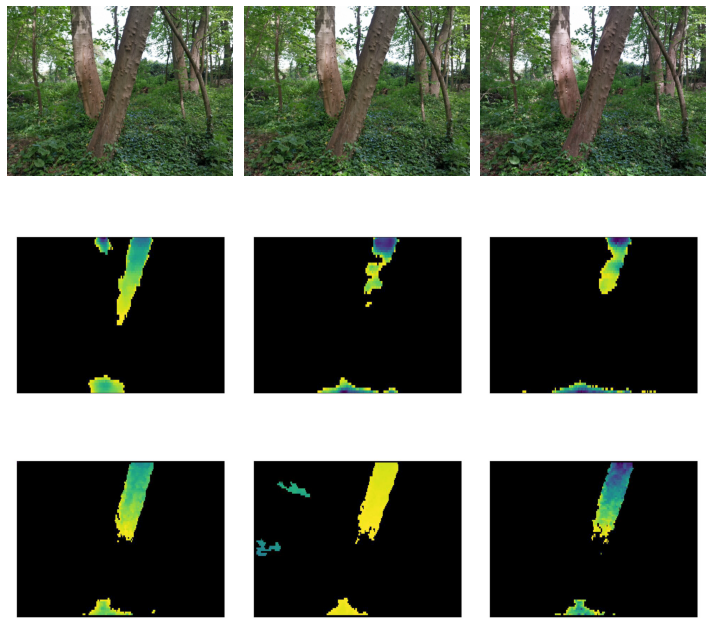

In [29]:
plot_samples(sample_n=32, shot_n=76, save=True, save_name="sample_32_plot.jpg")

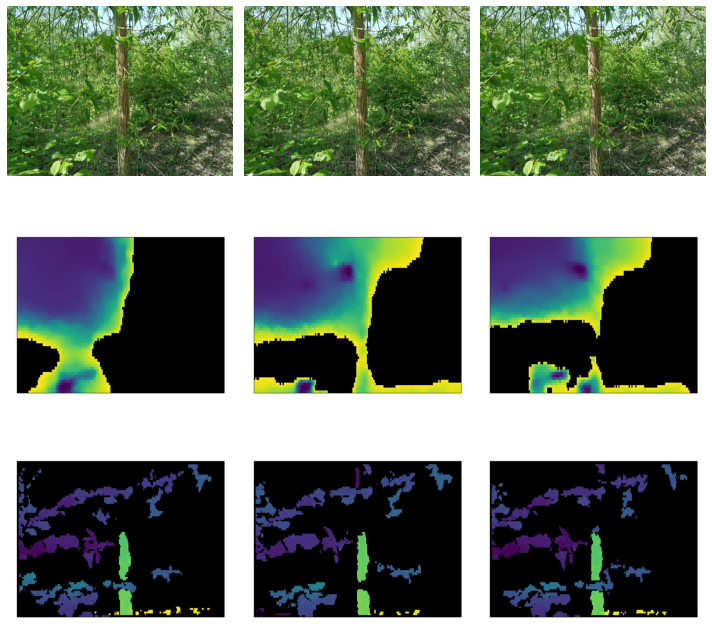

In [31]:
plot_samples(28, 64, save=True, save_name="sample_28_plot.jpg")

Plots without filter, normalised scale

In [8]:
def extract_data(filename):
    # Read in the data
    data = np.genfromtxt(filename, delimiter=',')
    depth_range = data[:,2]

    return data[:,0], data[:,1], depth_range.astype(np.float64)

def plot_depth(infile, width, height):
    # print('extracting ...')
    x, y, depth = extract_data(infile)
    depth = np.reshape(depth, (width, height))

    norm = plt.Normalize(0, depth.max())
    # print('drawing ...')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    palette = copy.copy(plt.cm.viridis)
    palette.set_bad('black')

    ax.matshow(depth, norm=norm, cmap=palette)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # plt.tight_layout()
    
    return ax 
    # plt.savefig(infile + ".jpg")
    # print('done!')
    # print('file saved as ' + infile + '.jpg')

In [29]:
def plot_scene(sample_n, shot_n, save=False, save_name=None):
    
    fig, axs = plt.subplots(
        nrows=3,
        ncols=3,
        figsize=(10, 10),
    )

    for i in range(3):
            img = mpimg.imread(f'/Users/sofija/Desktop/Tree/samples/Capture_Sample_{sample_n}_{shot_n+i}.jpeg')
            axs[0, i].imshow(img)
            axs[0, i].axis("off")
            
            
            x, y, depth = extract_data(f'/Users/sofija/Desktop/Tree/samples/Capture_Sample_{sample_n}_{shot_n+i}')
            depth = np.reshape(depth, (120, 160))

            norm = plt.Normalize(0, depth.max())
            palette = copy.copy(plt.cm.viridis)
            palette.set_bad('black')

            axs[1, i].matshow(depth, norm=norm, cmap=palette)
            axs[1, i].get_xaxis().set_visible(False)
            axs[1, i].get_yaxis().set_visible(False)
            
            
            x, y, depth = extract_data(f'/Users/sofija/Desktop/Tree/tof_samples/Capture_Sample_ToF_{sample_n}_{shot_n+i}')
            depth = np.reshape(depth, (180, 240))

            norm = plt.Normalize(0, depth.max())
            palette = copy.copy(plt.cm.viridis)
            palette.set_bad('black')

            axs[2, i].matshow(depth, norm=norm, cmap=palette)
            axs[2, i].get_xaxis().set_visible(False)
            axs[2, i].get_yaxis().set_visible(False)
            
    plt.tight_layout()
    return depth
    if save: 
        plt.savefig("/Users/sofija/Desktop/example depths/" + save_name)

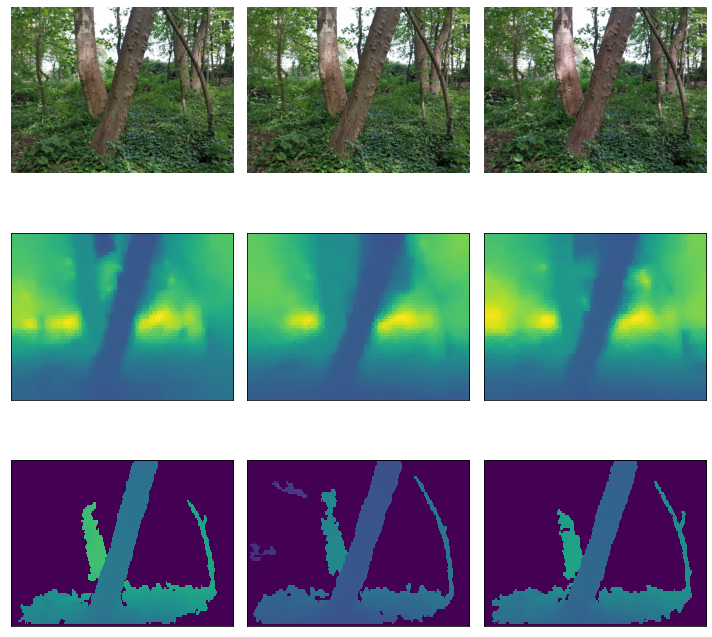

In [31]:
d = plot_scene(32, 76)

In [34]:
d

array([[6.136, 5.77 , 5.141, ..., 0.   , 0.   , 0.   ],
       [6.136, 5.77 , 5.141, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

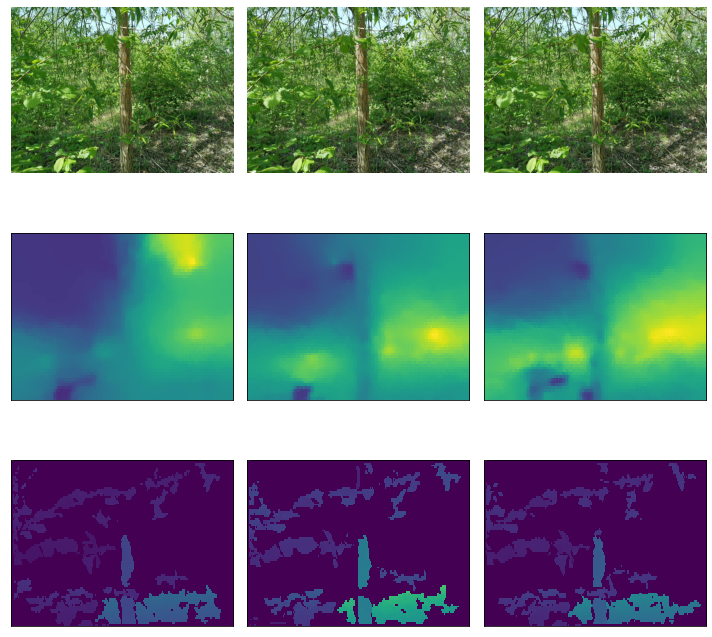

In [27]:
plot_scene(28, 64)

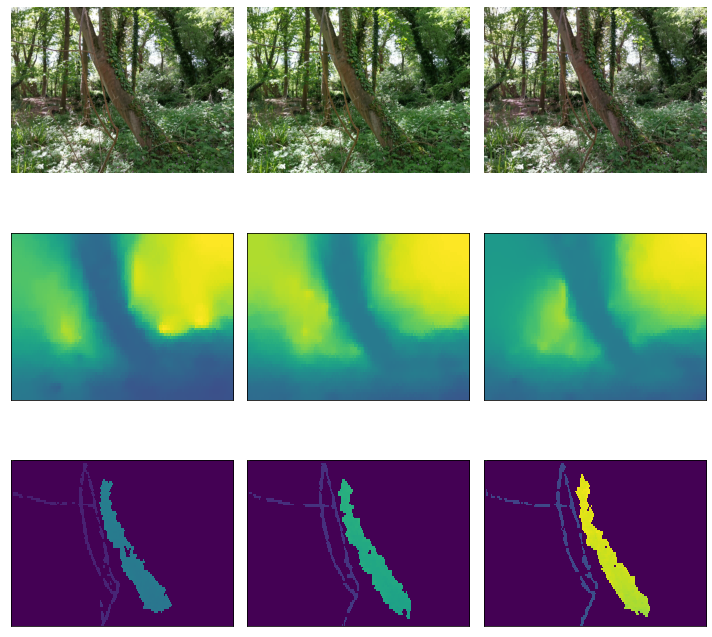

In [28]:
plot_scene(25, 55)

In [10]:
root = '/Users/sofija/Ai4er/mres/tree-segmentation/'

In [14]:
from PIL import Image
im = Image.open(root + 'data/depths/Capture_Sample_1_1.jpg')
im.show()

In [13]:
im.size

(160, 120)

In [15]:
im.size

(591, 450)